In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten  , Input , Conv2D , MaxPooling2D , BatchNormalization , Dropout
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


In [88]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [51]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [89]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [90]:
# normalization
X_train=X_train/255
X_test=X_test/255

In [54]:
# Data Augmentation
image_generator=ImageDataGenerator(zoom_range=0.2,horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

In [55]:
print(X_train.shape[0])

X_train.shape[0]//128

50000


390

In [56]:
batch_size=128

In [57]:
steps_per_epoch=X_train.shape[0]//batch_size

In [58]:
generated_data=image_generator.flow(X_train,y_train, batch_size=batch_size)


In [59]:
# input layer
i=Input(shape=(32,32,3))

# cnn / Feature Extraction
x=Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(i)
x=MaxPooling2D(pool_size=(2,2))(x)
x=BatchNormalization()(x)

x=Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=BatchNormalization()(x)

x=Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)

x=Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=BatchNormalization()(x)

x=Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)

x=Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)

# Dense
x=Flatten()(x)

x=Dense(units=1024, activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(units=512, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(units=128, activation='relu')(x)
x=Dropout(0.2)(x)


# output layer
o=Dense(units=10, activation='softmax')(x)

In [60]:
model=Model(inputs=[i], outputs=[o])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_18 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 8, 8, 64)          0   

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history=model.fit_generator(generated_data, epochs=50, steps_per_epoch=steps_per_epoch, validation_data=(X_test,y_test))

<ipython-input-62-188e005b5087>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generated_data, epochs=50, steps_per_epoch=steps_per_epoch, validation_data=(X_test,y_test))


Epoch 1/50
390/390 [==============================] - 42s 96ms/step - loss: 1.6225 - accuracy: 0.4182 - val_loss: 2.8902 - val_accuracy: 0.2632
Epoch 2/50
390/390 [==============================] - 34s 88ms/step - loss: 1.2458 - accuracy: 0.5632 - val_loss: 1.2452 - val_accuracy: 0.5651
Epoch 3/50
390/390 [==============================] - 34s 86ms/step - loss: 1.0664 - accuracy: 0.6351 - val_loss: 1.0143 - val_accuracy: 0.6572
Epoch 4/50
390/390 [==============================] - 35s 89ms/step - loss: 0.9500 - accuracy: 0.6770 - val_loss: 0.9552 - val_accuracy: 0.6860
Epoch 5/50
390/390 [==============================] - 34s 87ms/step - loss: 0.8751 - accuracy: 0.7061 - val_loss: 1.2610 - val_accuracy: 0.6278
Epoch 6/50
390/390 [==============================] - 35s 89ms/step - loss: 0.8117 - accuracy: 0.7299 - val_loss: 0.7288 - val_accuracy: 0.7505
Epoch 7/50
390/390 [==============================] - 35s 89ms/step - loss: 0.7672 - accuracy: 0.7457 - val_loss: 0.8858 - val_accuracy:

In [64]:
loss=history.history['loss']
val_loss=history.history['val_loss']


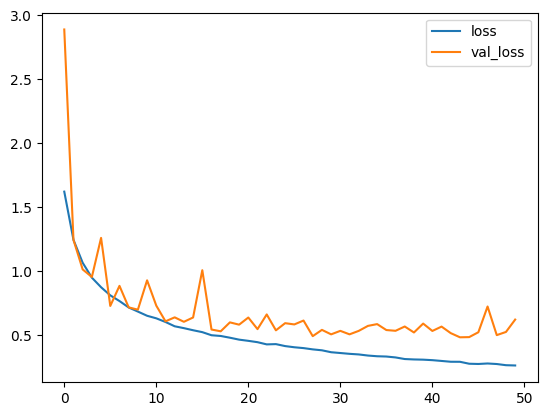

In [67]:
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [105]:
predications=model.predict(X_test)
predications

313/313 [==============================] - 1s 2ms/step


array([[1.16845639e-02, 3.23262781e-01, 1.51425609e-02, ...,
        3.26803722e-03, 1.29581941e-02, 1.62852760e-02],
       [4.37664799e-03, 6.08031571e-01, 2.09922946e-05, ...,
        2.61572586e-06, 3.77851278e-01, 9.49154608e-03],
       [5.09541668e-02, 4.76495363e-03, 1.78560469e-04, ...,
        3.84265732e-04, 9.41526651e-01, 1.73890567e-03],
       ...,
       [3.32045360e-08, 2.47409901e-07, 1.64417597e-05, ...,
        4.67175823e-07, 7.34600325e-10, 1.04189645e-07],
       [4.89365831e-15, 9.99999881e-01, 6.88129199e-22, ...,
        1.37829642e-19, 5.61000721e-15, 9.99653054e-08],
       [9.16507185e-17, 4.28952505e-24, 5.26302712e-21, ...,
        1.00000000e+00, 1.38513881e-33, 1.04224389e-19]], dtype=float32)

In [106]:
predications=np.argmax(predications, axis=1)
predications

array([3, 1, 8, ..., 5, 1, 7])

In [107]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [108]:
y_test=np.argmax(y_test, axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predications)

array([[890,  25,  19,   4,   1,   0,   9,   7,  17,  28],
       [  3, 957,   0,   1,   0,   0,   1,   0,   4,  34],
       [ 49,  10, 779,  23,  24,  17,  68,  15,   4,  11],
       [ 29,  26,  51, 613,  44,  60, 101,  39,  16,  21],
       [ 20,   6,  46,  21, 776,   6,  50,  66,   5,   4],
       [ 21,  21,  41, 119,  27, 630,  65,  56,   9,  11],
       [ 13,   9,  15,  13,   5,   1, 932,   4,   1,   7],
       [ 17,   6,  13,  10,   5,   8,   5, 923,   2,  11],
       [ 73,  37,   9,   2,   4,   0,   4,   1, 844,  26],
       [ 18,  54,   2,   1,   0,   0,   2,   2,   3, 918]])

In [100]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [110]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [114]:
labels[5]

'dog'

In [119]:
predications[5]

6

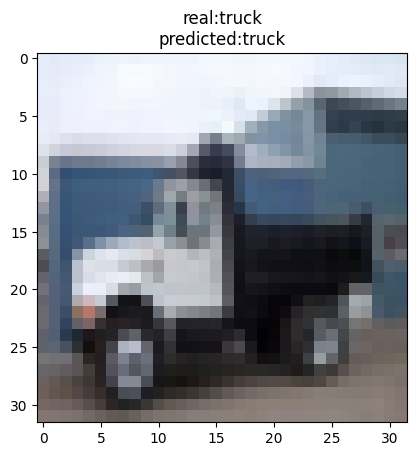

In [146]:
random=np.random.randint(0,1000)
plt.imshow(X_test[random])
plt.title('real:'+labels[y_test[random]]+ '\n'+'predicted:'+labels[predications[random]])
plt.show()